In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import numpy as np

In [ ]:
df = pd.read_csv('credit_card_churn.csv')
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

Data Exploration
ข้อมุลไม่มีช่องไหนที่หายไป
ข้อมูลประกอบไปด้วย feature 21 ตัวดังนี้
- Clientnum: หมายเลขที่ใช้ระบุลูกค้า
- Customer Age: อายุ
- Gender: เพศ
- Dependent count: จำนวนบุตรที่อยู่ในการอุปการะ
- Education level: การศึกษา
- Martial Status: สถานภาพ
- Income Category: หมวดหมู่รายได้ประจำปี
- Card Category: ชนิดของบัตรที่ถือ
- Months on book: **
- Total Relationship Count: จำนวน product ที่ถืออยู่
- Month inactive last 12 months: จำนวนเดือนที่ไม่ได้ใช้งาน
- Contact Count last 12 months: จำนวนการติดต่อ
- Credit Limit: จำกัดวงเงินในบัตรเครดิต
- Total Revolving Balance: ยอดเงินหมุนเวียนในบัตรเครดิต
- Average Open to buy: **
- Change in Transaction Amount (Q4 over Q1): ยอดการเปลี่ยนแปลงธุรกรรม
- Total Transaction Amount (Last 12 months): ยอดรวมธุรกรรม
- Total transaction count last 12 months: จำนวนธุรกรรม
- Change in Transaction Count (Q4 over Q1): จำนวนครั้งการเปลี่ยนแปลงธุรกรรม
- Average Card Utilization Ratio: อัตราการใช้บัตรเฉลี่ย
- Attrition_Flag: เธอจะอยู่หรือเธอจะไป

In [ ]:
print(df.isnull().sum())

##### Clientnum
- รหัสลูกค้าเป็นข้อมูลที่ดูไม่มีความสัมพันธุ์อะไรกับข้อมูลอื่นๆที่สื่อถึงการสูญเสียลูกค้าแต่อาจจะมีความสัมพันธุ์กับการระบุตัวตนของผู้ใช้งานหรือประเภทบัตรได้
- เมื่อ plot ดูความสัมพันธุ์แล้วพบว่าไม่มีความสัมพันธุ์ใดๆ จึงทำการตัดข้อมูล Clientnum ออก

In [ ]:
df1 = df[['CLIENTNUM', 'Customer_Age', 'Attrition_Flag']]
card_cat = df['Card_Category']
label_encoder = sklearn.preprocessing.LabelEncoder()
card_cat = label_encoder.fit_transform(card_cat)
df1['Card_Category'] = card_cat
#df1.loc[:, 'Card_Category'] = card_cat
plt.figure(figsize = (8,4))
sns.pairplot(df1, hue="Attrition_Flag")


##### Customer Age
    - ข้อมูลอายุมีการกระจายเกือบจะเป็น normal distribution โดยลูกค้าส่วนมากมีอายุช่วง 40 - 50 ปี มีความแปรปรวนเท่ากับ 64
    - ช่วงอายุไม่มีความสัมพันธุ์กับการสูญเสียลูกค้าทั้ง Existing customer และ Attrited customer มีอายุเฉลี่ยประมาณ 45 เท่ากัน
    - ช่วงอายุที่มากกว่า 66 อาจพิจารณาเป็น outlier
    - ข้อมูลอายุมีความสัมพันธุ์กับฟีเจอร์ month on book

In [ ]:
df = df.drop(['CLIENTNUM'], axis=1)

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

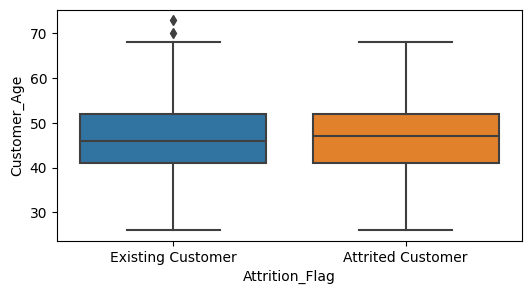

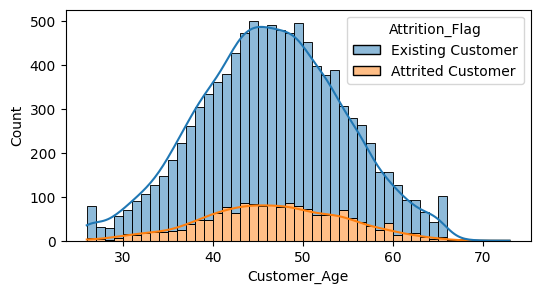

In [78]:
plt.figure(figsize = (6,3))
sns.boxplot(data=df, x='Attrition_Flag', y='Customer_Age')
plt.figure(figsize = (6,3))
sns.histplot(data=df, x="Customer_Age", hue="Attrition_Flag", multiple="stack", kde=True)
df['Customer_Age'].describe()

<Figure size 1600x900 with 0 Axes>

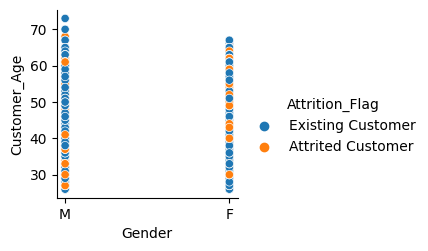

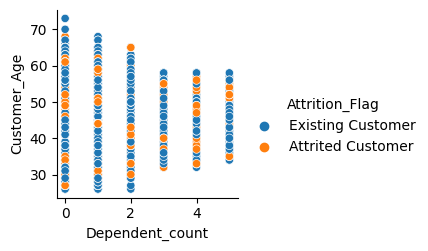

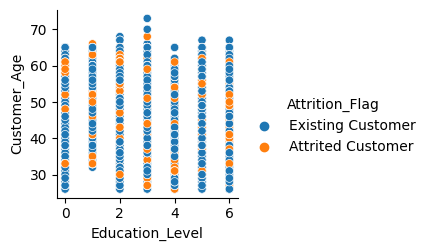

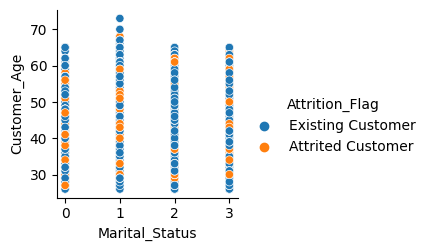

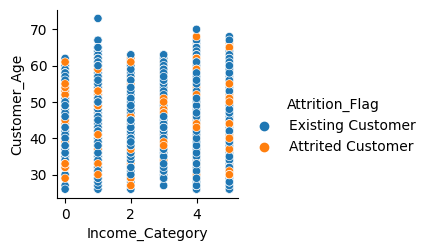

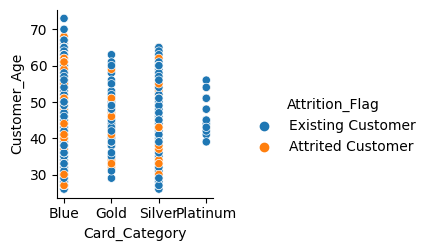

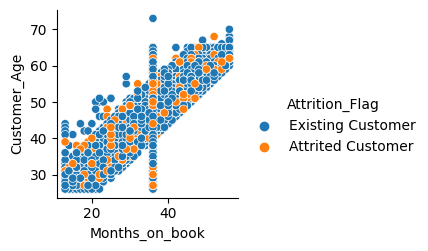

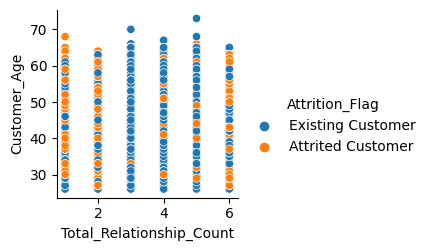

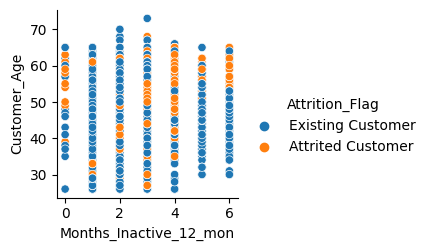

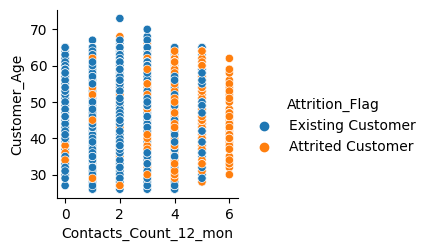

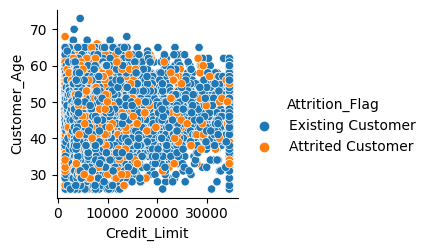

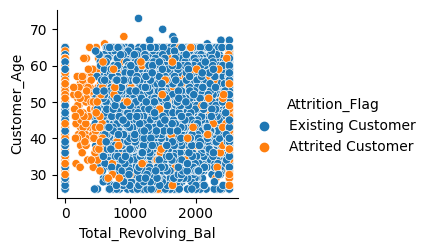

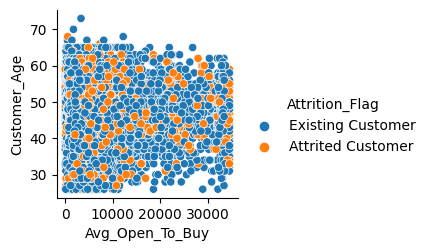

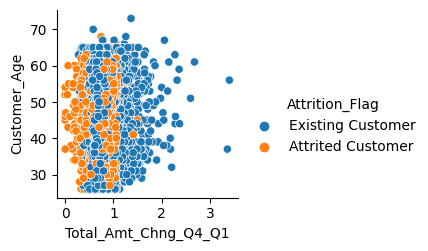

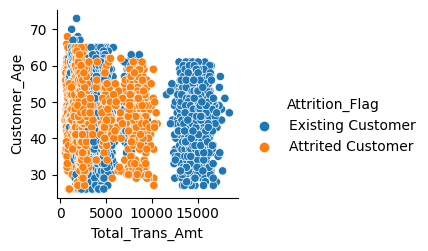

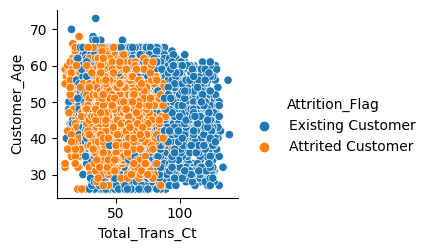

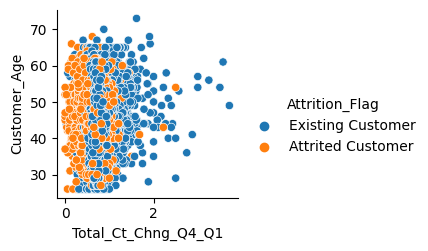

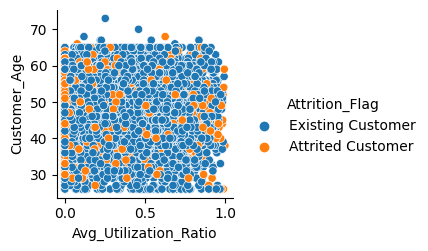

In [80]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age'], axis=1).columns
plt.figure(figsize = (16,9))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Customer_Age"],
        hue = 'Attrition_Flag'
    )

##### Gender
    - จำนวนประชากรเพศชายกับหญิงมีจำนวนห่างกันเพียง 589 คน
    - ข้อมูลเพศของลูกค้าดูไม่มีความสัมพันธุ์ใดๆกับข้อมูลอื่นๆ

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x="Gender", hue="Attrition_Flag")
df['Gender'].value_counts()

In [ ]:
df1 = df
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender'], axis=1).columns
gender = df['Gender']
label_encoder = sklearn.preprocessing.LabelEncoder()
gender = label_encoder.fit_transform(gender)
df1['Gender'] = gender
plt.figure(figsize = (16,8))
for i in col_name:
    sns.pairplot(
        df1,
        x_vars= i,
        y_vars=["Gender"],
        hue = 'Attrition_Flag'
    )

##### Dependent Count
    - ลูกค้าส่วนมากมีบุตร 2-3 คน
    - จำนวนบุตรไม่มีความสัมพันธุ์ใดๆกับข้อมูลอื่นๆจึงพิจารณาที่จะตัดทิ้งได้

In [ ]:
sns.histplot(data=df, x="Dependent_count", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender'], axis=1).columns
plt.figure(figsize = (16,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Dependent_count"],
        hue = 'Attrition_Flag'
    )

##### Education Level
    - ลูกค้าส่วนมากเป็นลูกค้าที่เรียนจบแล้ว
    - ระดับการศึกษาไม่มีความสัมพันธุ์ใดๆกับข้อมูลอื่นๆจึงตัดทิ้ง

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x="Education_Level", hue="Attrition_Flag")
df['Education_Level'].value_counts()

In [ ]:
df1 = df
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count'], axis=1).columns
edu = df['Education_Level']
label_encoder = sklearn.preprocessing.LabelEncoder()
edu = label_encoder.fit_transform(edu)
df1['Education_Level'] = edu
plt.figure(figsize = (16,8))
for i in col_name:
    sns.pairplot(
        df1,
        x_vars= i,
        y_vars=["Education_Level"],
        hue = 'Attrition_Flag'
    )

##### Marital Status
    - สถานภาพไม่มีความสัมพันธุ์ใดๆกับข้อมูลอื่นๆ

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x="Marital_Status", hue="Attrition_Flag")
df['Marital_Status'].value_counts()

In [ ]:
df1 = df
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level'], axis=1).columns
marital = df['Marital_Status']
label_encoder = sklearn.preprocessing.LabelEncoder()
marital = label_encoder.fit_transform(marital)
df1['Marital_Status'] = marital
plt.figure(figsize = (16,8))
for i in col_name:
    sns.pairplot(
        df1,
        x_vars= i,
        y_vars=["Marital_Status"],
        hue = 'Attrition_Flag'
    )

##### Income Category
    - ลูกค้าส่วนใหญ่มีรายได้ต่ำกว่า 40000
    - ไม่รู้ว้าว

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x="Income_Category", hue="Attrition_Flag")
df['Income_Category'].value_counts()

In [ ]:
df1 = df
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status'], axis=1).columns
income = df['Income_Category']
label_encoder = sklearn.preprocessing.LabelEncoder()
income = label_encoder.fit_transform(income)
df1['Income_Category'] = income
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df1,
        x_vars= i,
        y_vars=["Income_Category"],
        hue = 'Attrition_Flag'
    )

##### Card Category
    - ผู้ใช้งานส่วนมากเป็นผู้ใช้งานระดับ Blue
    - ยังม่ายเสร็จ

In [ ]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x="Card_Category", hue="Attrition_Flag")
df['Card_Category'].value_counts()

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Card_Category"],
        hue = 'Attrition_Flag'
    )

##### Months_on_book
    - จำนวนมากสุด 36 คือ 2463 คน

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Months_on_book", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Months_on_book"],
        hue = 'Attrition_Flag'
    )

##### Total_Relationship_Count

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Relationship_Count", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count' ], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Total_Relationship_Count"],
        hue = 'Attrition_Flag'
    )

##### Months Inactive 12_mon

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Months_Inactive_12_mon", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Months_Inactive_12_mon"],
        hue = 'Attrition_Flag'
    )

##### Contacts_Count_12_mon

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Contacts_Count_12_mon", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Contacts_Count_12_mon"],
        hue = 'Attrition_Flag'
    )

##### Credit_Limit

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Credit_Limit", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Credit_Limit"],
        hue = 'Attrition_Flag'
    )

##### Total_Revolving_Bal

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Revolving_Bal", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Total_Revolving_Bal"],
        hue = 'Attrition_Flag'
    )

##### Avg_Open_To_Buy

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Avg_Open_To_Buy", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Avg_Open_To_Buy"],
        hue = 'Attrition_Flag'
    )

##### Total_Amt_Chng_Q4_Q1

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Amt_Chng_Q4_Q1", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Total_Amt_Chng_Q4_Q1"],
        hue = 'Attrition_Flag'
    )

##### Total_Trans_Amt

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Trans_Amt", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Total_Trans_Amt"],
        hue = 'Attrition_Flag'
    )

##### Total_Trans_Ct

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Trans_Ct", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Total_Trans_Ct"],
        hue = 'Attrition_Flag'
    )

##### Total_Ct_Chng_Q4_Q1

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Total_Ct_Chng_Q4_Q1", hue="Attrition_Flag", multiple="stack", kde=True)

In [ ]:
col_name = df.drop(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'], axis=1).columns
plt.figure(figsize = (25,8))
for i in col_name:
    sns.pairplot(
        df,
        x_vars= i,
        y_vars=["Total_Ct_Chng_Q4_Q1"],
        hue = 'Attrition_Flag'
    )

##### Avg_Utilization_Ratio

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(data=df, x="Avg_Utilization_Ratio", hue="Attrition_Flag", multiple="stack", kde=True)

##### Note

In [ ]:
a = df.groupby('Attrition_Flag')
a.mean()

In [ ]:
import sklearn.preprocessing

x = df.drop(['Attrition_Flag'], axis = 1)
y = df['Attrition_Flag']

x = pd.get_dummies(x)
label_encoder = sklearn.preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
import sklearn.feature_selection
from sklearn.feature_selection import chi2

selector = sklearn.feature_selection.SelectKBest(chi2, k=4)
x_new = selector.fit(x,y)
col = selector.get_support(indices=True)   #all indices are saved in col.
x_new = x.iloc[:,col]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_new)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.1,random_state = 0)

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

In [ ]:
y_pred = model_logistic.predict(x_train)

from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)           # Create PCA transformer
x_pca = pca.fit_transform(x)
print(pca.explained_variance_ratio_)
pd.DataFrame(x_pca).head()

In [ ]:
sns.pairplot(df, hue = 'Attrition_Flag')